In [120]:
import pandas as pd
from tqdm.auto import tqdm
from googletrans import Translator

In [121]:
translator = Translator()

In [3]:
df = pd.read_csv('data/train.csv',sep = '|')
df.columns = ['Pregunta', 'Intencion']
print(f'df shape: {df.shape}')
df.head(2)

df shape: (20104, 2)


,Pregunta,Intencion
0,como puedo trabajar en santander rio,Cat_102
1,pagar tarjeta visa querer reintegro,Cat_350


In [5]:
sentences_es = list(df.Pregunta.values)
print(f'Amount of sentences {len(sentences_es)}')
sentences_es[:2]

Amount of sentences 20104


['como puedo trabajar en santander rio', 'pagar tarjeta visa querer reintegro']

In [4]:
df_test = pd.read_csv('data/test_santander.csv')
print(f'df shape: {df_test.shape}')
df_test.head(2)

df shape: (6702, 2)


,id,Pregunta
0,0,querer saber tarjeta sin limite
1,1,¿cuál es el límite de mi tarjeta santander?


In [9]:
sentences_es_test = list(df_test.Pregunta.values)
print(f'Amount of sentences {len(sentences_es_test)}')
sentences_es_test[:2]

Amount of sentences 6702


['querer saber tarjeta sin limite',
 '¿cuál es el límite de mi tarjeta santander?']

## es --> fr --> es

In [ ]:
translations_fr = []
for sent in tqdm(sentences_es):
    translation = translator.translate(sent, src="es", dest="fr").text
    translations_fr.append(translation)
print(f'Amount sentences en: {len(translations_fr)}')
translations_fr[:2]

translations_es_back = []
for sent in tqdm(translations_fr):
    translation = translator.translate(sent, src="fr", dest="es").text
    translations_es_back.append(translation)
print(f'Amount sentences en: {len(translations_es_back)}')
translations_es_back[:2]

In [14]:
df["Pregunta_T2_fr"] = translations_es_back

translations_fr = []
for sent in tqdm(sentences_es_test):
    translation = translator.translate(sent, src="es", dest="fr").text
    translations_fr.append(translation)
print(f'Amount sentences en: {len(translations_fr)}')
translations_fr[:2]

translations_es_back = []
for sent in tqdm(translations_fr):
    translation = translator.translate(sent, src="fr", dest="es").text
    translations_es_back.append(translation)
print(f'Amount sentences en: {len(translations_es_back)}')
translations_es_back[:2]

df_test["Pregunta_T2_fr"] = translations_es_back


Amount sentences en: 6702



Amount sentences en: 6702


In [19]:
df.to_csv("data/train_translation_fr.csv", index=False)
df_test.to_csv("data/test_translation_fr.csv", index=False)

In [21]:
!pip install joblib

In [25]:
from textacy.preprocess import preprocess_text as textacy_preprocess
import re

In [ ]:
EMOJI_PATTERN = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)


def remove_stopwords(text):
    """Remove stop words from list of tokenized words."""
    new_words = [word for word in text.split() if word not in STOPWORDS_SET]
    return ' '.join(new_words)


def remove_emoticons(text):
    """Remove emoticos."""
    return EMOJI_PATTERN.sub('', text)


def to_lowercase(text):
    """To lowercase."""
    return text.lower()


def preprocess_text(text, fix_unicode=True, lowercase=True,
                    no_urls=True, no_emails=True,
                    no_phone_numbers=True,
                    no_numbers=True, no_currency_symbols=True,
                    no_punct=True, no_accents=True):
    """Preprocess text."""
    clean_text = ""
    if text:
        clean_text = remove_emoticons(text)
        if lowercase:
            clean_text = to_lowercase(clean_text)
#        clean_text = remove_stopwords(clean_text)
        clean_text = textacy_preprocess(clean_text, fix_unicode=fix_unicode,
                                        lowercase=lowercase,
                                        no_urls=no_urls, no_emails=no_emails,
                                        no_phone_numbers=no_phone_numbers,
                                        no_numbers=no_numbers,
                                        no_currency_symbols=no_currency_symbols,
                                        no_punct=no_punct,
                                        no_accents=no_accents)
    return clean_text

In [27]:
df.head()

,Pregunta,Intencion,Pregunta_T2_fr
0,como puedo trabajar en santander rio,Cat_102,¿Cómo puedo trabajar en Santander Rio?
1,pagar tarjeta visa querer reintegro,Cat_350,pagar la tarjeta visa quiere un reembolso
2,pagar tarjeta naranja sistema,Cat_132,sistema de pago con tarjeta naranja
3,no se debitó la primera cuota del plan de bien...,Cat_129,la primera parte del plan de propiedad persona...
4,abonar tarjeta credito,Cat_342,tarjeta de crédito


In [28]:
df["clean_txt_T2_fr"] = df["Pregunta_T2_fr"].apply(lambda x: preprocess_text(x))

In [29]:
df.head()

,Pregunta,Intencion,Pregunta_T2_fr,clean_txt_T2_fr
0,como puedo trabajar en santander rio,Cat_102,¿Cómo puedo trabajar en Santander Rio?,como puedo trabajar en santander rio
1,pagar tarjeta visa querer reintegro,Cat_350,pagar la tarjeta visa quiere un reembolso,pagar la tarjeta visa quiere un reembolso
2,pagar tarjeta naranja sistema,Cat_132,sistema de pago con tarjeta naranja,sistema de pago con tarjeta naranja
3,no se debitó la primera cuota del plan de bien...,Cat_129,la primera parte del plan de propiedad persona...,la primera parte del plan de propiedad persona...
4,abonar tarjeta credito,Cat_342,tarjeta de crédito,tarjeta de credito


In [30]:
df_train = pd.read_csv("data/train_with_translations_clean.csv")

In [31]:
df_train.head()

,Pregunta,Intencion,Pregunta_T1,clean_txt,clean_txt_T1
0,como puedo trabajar en santander rio,Cat_102,¿Cómo puedo trabajar en Santander Rio?,como puedo trabajar en santander rio,como puedo trabajar en santander rio
1,pagar tarjeta visa querer reintegro,Cat_350,pagar tarjeta visa quiere reembolso,pagar tarjeta visa querer reintegro,pagar tarjeta visa quiere reembolso
2,pagar tarjeta naranja sistema,Cat_132,tarjeta naranja del sistema de pago,pagar tarjeta naranja sistema,tarjeta naranja del sistema de pago
3,no se debitó la primera cuota del plan de bien...,Cat_129,la primera cuota del plan de propiedad persona...,no se debito la primera cuota del plan de bien...,la primera cuota del plan de propiedad persona...
4,abonar tarjeta credito,Cat_342,tarjeta de crédito,abonar tarjeta credito,tarjeta de credito


In [32]:
df_train["Pregunta_T2_fr"] = df["Pregunta_T2_fr"]
df_train["clean_txt_T2_fr"] = df["clean_txt_T2_fr"]

In [33]:
df_train.head()

,Pregunta,Intencion,Pregunta_T1,clean_txt,clean_txt_T1,Pregunta_T2_fr,clean_txt_T2_fr
0,como puedo trabajar en santander rio,Cat_102,¿Cómo puedo trabajar en Santander Rio?,como puedo trabajar en santander rio,como puedo trabajar en santander rio,¿Cómo puedo trabajar en Santander Rio?,como puedo trabajar en santander rio
1,pagar tarjeta visa querer reintegro,Cat_350,pagar tarjeta visa quiere reembolso,pagar tarjeta visa querer reintegro,pagar tarjeta visa quiere reembolso,pagar la tarjeta visa quiere un reembolso,pagar la tarjeta visa quiere un reembolso
2,pagar tarjeta naranja sistema,Cat_132,tarjeta naranja del sistema de pago,pagar tarjeta naranja sistema,tarjeta naranja del sistema de pago,sistema de pago con tarjeta naranja,sistema de pago con tarjeta naranja
3,no se debitó la primera cuota del plan de bien...,Cat_129,la primera cuota del plan de propiedad persona...,no se debito la primera cuota del plan de bien...,la primera cuota del plan de propiedad persona...,la primera parte del plan de propiedad persona...,la primera parte del plan de propiedad persona...
4,abonar tarjeta credito,Cat_342,tarjeta de crédito,abonar tarjeta credito,tarjeta de credito,tarjeta de crédito,tarjeta de credito


In [34]:
df_test_es_en = pd.read_csv("data/test_with_translations_clean.csv")

In [39]:
df_test["clean_txt_T2_fr"] = df_test["Pregunta_T2_fr"].apply(lambda x: preprocess_text(x))

In [40]:
df_test.head()

,id,Pregunta,Pregunta_T2_fr,clean_txt_T2_fr
0,0,querer saber tarjeta sin limite,quiero saber la tarjeta sin limite,quiero saber la tarjeta sin limite
1,1,¿cuál es el límite de mi tarjeta santander?,¿Cuál es el límite de mi tarjeta santander?,cual es el limite de mi tarjeta santander
2,2,hay beneficios en restaurantes de la costa atl...,¿Hay ventajas en los restaurantes de la costa ...,hay ventajas en los restaurantes de la costa a...
3,3,semana realizar pagar afip monotributo volver ...,semana recibir el pago de una declaración de i...,semana recibir el pago de una declaracion de i...
4,4,por un prestamo de mil. cuanto es el interes?,por un préstamo de mil. cual es el punto,por un prestamo de mil cual es el punto


In [41]:
df_test_es_en["Pregunta_T2_fr"] = df_test["Pregunta_T2_fr"]
df_test_es_en["clean_txt_T2_fr"] = df_test["clean_txt_T2_fr"]

In [42]:
df_test_es_en.head()

,id,Pregunta,Pregunta_T1,clean_txt,clean_txt_T1,Pregunta_T2_fr,clean_txt_T2_fr
0,0,querer saber tarjeta sin limite,quiero saber tarjeta sin límite,querer saber tarjeta sin limite,quiero saber tarjeta sin limite,quiero saber la tarjeta sin limite,quiero saber la tarjeta sin limite
1,1,¿cuál es el límite de mi tarjeta santander?,¿Cuál es el límite de mi tarjeta santander?,cual es el limite de mi tarjeta santander,cual es el limite de mi tarjeta santander,¿Cuál es el límite de mi tarjeta santander?,cual es el limite de mi tarjeta santander
2,2,hay beneficios en restaurantes de la costa atl...,¿Hay beneficios en los restaurantes de la cost...,hay beneficios en restaurantes de la costa atl...,hay beneficios en los restaurantes de la costa...,¿Hay ventajas en los restaurantes de la costa ...,hay ventajas en los restaurantes de la costa a...
3,3,semana realizar pagar afip monotributo volver ...,la semana hace que pague la declaración de imp...,semana realizar pagar afip monotributo volver ...,la semana hace que pague la declaracion de imp...,semana recibir el pago de una declaración de i...,semana recibir el pago de una declaracion de i...
4,4,por un prestamo de mil. cuanto es el interes?,por un préstamo de mil. cuanto es el interes,por un prestamo de mil cuanto es el interes,por un prestamo de mil cuanto es el interes,por un préstamo de mil. cual es el punto,por un prestamo de mil cual es el punto


In [43]:
df_train.head()

,Pregunta,Intencion,Pregunta_T1,clean_txt,clean_txt_T1,Pregunta_T2_fr,clean_txt_T2_fr
0,como puedo trabajar en santander rio,Cat_102,¿Cómo puedo trabajar en Santander Rio?,como puedo trabajar en santander rio,como puedo trabajar en santander rio,¿Cómo puedo trabajar en Santander Rio?,como puedo trabajar en santander rio
1,pagar tarjeta visa querer reintegro,Cat_350,pagar tarjeta visa quiere reembolso,pagar tarjeta visa querer reintegro,pagar tarjeta visa quiere reembolso,pagar la tarjeta visa quiere un reembolso,pagar la tarjeta visa quiere un reembolso
2,pagar tarjeta naranja sistema,Cat_132,tarjeta naranja del sistema de pago,pagar tarjeta naranja sistema,tarjeta naranja del sistema de pago,sistema de pago con tarjeta naranja,sistema de pago con tarjeta naranja
3,no se debitó la primera cuota del plan de bien...,Cat_129,la primera cuota del plan de propiedad persona...,no se debito la primera cuota del plan de bien...,la primera cuota del plan de propiedad persona...,la primera parte del plan de propiedad persona...,la primera parte del plan de propiedad persona...
4,abonar tarjeta credito,Cat_342,tarjeta de crédito,abonar tarjeta credito,tarjeta de credito,tarjeta de crédito,tarjeta de credito


In [47]:
df_train.to_csv("data/train_with_translations_clean.csv", index=False)
df_test_es_en.to_csv("data/test_with_translations_clean.csv", index=False)

In [48]:
df = pd.read_csv("data/train_with_translations_clean.csv")

In [67]:
df = pd.read_csv("data/train_with_translations_clean.csv")

columns = ["clean_txt", "clean_txt_T1", "clean_txt_T2_fr"]

df_list = []
for col in columns:
    asd = df[[col, "Intencion"]]
    asd.columns = ["clean_txt", "Intencion"]
    df_list.append(asd)
train = pd.concat(df_list)
train.to_csv("data/train_with_translations_clean_all_es_en_fr.csv", index=False)

In [99]:
df = pd.read_csv("data/train_with_translations_clean.csv")
columns = ["clean_txt_T1", "clean_txt_T2_fr"]
df = df[columns + ["clean_txt", "Intencion"]]
df0 = df[["clean_txt", "Intencion"]].copy()
for col in columns:
    thr = df0["Intencion"].value_counts().values[0] // 2
    cats_to_popu = [ k for k, v in dict(df0["Intencion"].value_counts()).items() if v < thr]
    print(f'Amount categories to populate : {len(cats_to_popu)}')
    df1 = df[df["Intencion"].isin(cats_to_popu)][[col, "Intencion"]].copy()
    df1.columns = ["clean_txt", "Intencion"]
    df0 = pd.concat([df0, df1])

Amount categories to populate : 333
Amount categories to populate : 330


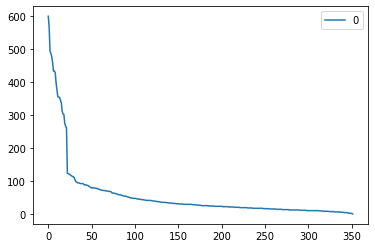

In [118]:
sns.lineplot(data=pd.DataFrame(list(df.Intencion.value_counts().values)))

In [108]:
import seaborn as sns

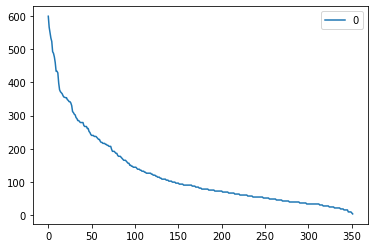

In [117]:
sns.lineplot(data=pd.DataFrame(list(df0.Intencion.value_counts().values)))

## es --> pr --> es

In [130]:
df = pd.read_csv("data/train_with_translations_clean.csv")
df_test = pd.read_csv("data/test_with_translations_clean.csv")

In [131]:
sentences_es = list(df.Pregunta.values)
print(f'Amount of sentences {len(sentences_es)}')
sentences_es[:2]

Amount of sentences 20104


['como puedo trabajar en santander rio', 'pagar tarjeta visa querer reintegro']

In [136]:
sentences_es_test = list(df_test.Pregunta.values)
print(f'Amount of sentences {len(sentences_es_test)}')
sentences_es_test[:2]

Amount of sentences 6702


['querer saber tarjeta sin limite',
 '¿cuál es el límite de mi tarjeta santander?']

In [138]:
translations_pt = []
for sent in tqdm(sentences_es):
    translation = translator.translate(sent, src="es", dest="pt").text
    translations_pt.append(translation)
print(f'Amount sentences en: {len(translations_pt)}')

translations_es_back = []
for sent in tqdm(translations_pt):
    translation = translator.translate(sent, src="pt", dest="es").text
    translations_es_back.append(translation)
print(f'Amount sentences en: {len(translations_es_back)}')

df["Pregunta_T3_pt"] = translations_es_back


translations_pt = []
for sent in tqdm(sentences_es_test):
    translation = translator.translate(sent, src="es", dest="pt").text
    translations_pt.append(translation)
print(f'Amount sentences en: {len(translations_pt)}')

translations_es_back = []
for sent in tqdm(translations_pt):
    translation = translator.translate(sent, src="pt", dest="es").text
    translations_es_back.append(translation)
print(f'Amount sentences en: {len(translations_es_back)}')

df_test["Pregunta_T3_pt"] = translations_es_back

Amount sentences en: 20104


Amount sentences en: 20104


Amount sentences en: 6702


Amount sentences en: 6702


In [139]:
df["clean_txt_T3_pt"] = df["Pregunta_T3_pt"].apply(lambda x: preprocess_text(x))
df_test["clean_txt_T3_pt"] = df_test["Pregunta_T3_pt"].apply(lambda x: preprocess_text(x))

In [140]:
df.head()

,Pregunta,Intencion,Pregunta_T1,clean_txt,clean_txt_T1,Pregunta_T2_fr,clean_txt_T2_fr,Pregunta_T3_pt,clean_txt_T3_pt
0,como puedo trabajar en santander rio,Cat_102,¿Cómo puedo trabajar en Santander Rio?,como puedo trabajar en santander rio,como puedo trabajar en santander rio,¿Cómo puedo trabajar en Santander Rio?,como puedo trabajar en santander rio,¿Cómo puedo trabajar en Santander Rio?,como puedo trabajar en santander rio
1,pagar tarjeta visa querer reintegro,Cat_350,pagar tarjeta visa quiere reembolso,pagar tarjeta visa querer reintegro,pagar tarjeta visa quiere reembolso,pagar la tarjeta visa quiere un reembolso,pagar la tarjeta visa quiere un reembolso,pagar tarjeta visa quiere reembolso,pagar tarjeta visa quiere reembolso
2,pagar tarjeta naranja sistema,Cat_132,tarjeta naranja del sistema de pago,pagar tarjeta naranja sistema,tarjeta naranja del sistema de pago,sistema de pago con tarjeta naranja,sistema de pago con tarjeta naranja,sistema de pago con tarjeta naranja,sistema de pago con tarjeta naranja
3,no se debitó la primera cuota del plan de bien...,Cat_129,la primera cuota del plan de propiedad persona...,no se debito la primera cuota del plan de bien...,la primera cuota del plan de propiedad persona...,la primera parte del plan de propiedad persona...,la primera parte del plan de propiedad persona...,No se ha cobrado la primera cuota del plan de ...,no se ha cobrado la primera cuota del plan de ...
4,abonar tarjeta credito,Cat_342,tarjeta de crédito,abonar tarjeta credito,tarjeta de credito,tarjeta de crédito,tarjeta de credito,tarjeta de crédito,tarjeta de credito


In [142]:
df_test.head()

,id,Pregunta,Pregunta_T1,clean_txt,clean_txt_T1,Pregunta_T2_fr,clean_txt_T2_fr,Pregunta_T3_pt,clean_txt_T3_pt
0,0,querer saber tarjeta sin limite,quiero saber tarjeta sin límite,querer saber tarjeta sin limite,quiero saber tarjeta sin limite,quiero saber la tarjeta sin limite,quiero saber la tarjeta sin limite,quiero saber tarjeta ilimitada,quiero saber tarjeta ilimitada
1,1,¿cuál es el límite de mi tarjeta santander?,¿Cuál es el límite de mi tarjeta santander?,cual es el limite de mi tarjeta santander,cual es el limite de mi tarjeta santander,¿Cuál es el límite de mi tarjeta santander?,cual es el limite de mi tarjeta santander,Qual é o limite do meu cartão santander?,qual e o limite do meu cartao santander
2,2,hay beneficios en restaurantes de la costa atl...,¿Hay beneficios en los restaurantes de la cost...,hay beneficios en restaurantes de la costa atl...,hay beneficios en los restaurantes de la costa...,¿Hay ventajas en los restaurantes de la costa ...,hay ventajas en los restaurantes de la costa a...,¿Hay beneficios en los restaurantes de la cost...,hay beneficios en los restaurantes de la costa...
3,3,semana realizar pagar afip monotributo volver ...,la semana hace que pague la declaración de imp...,semana realizar pagar afip monotributo volver ...,la semana hace que pague la declaracion de imp...,semana recibir el pago de una declaración de i...,semana recibir el pago de una declaracion de i...,semana pago retorno solo afip de impuestos apa...,semana pago retorno solo afip de impuestos apa...
4,4,por un prestamo de mil. cuanto es el interes?,por un préstamo de mil. cuanto es el interes,por un prestamo de mil cuanto es el interes,por un prestamo de mil cuanto es el interes,por un préstamo de mil. cual es el punto,por un prestamo de mil cual es el punto,por un préstamo de mil. cuanto es el interes,por un prestamo de mil cuanto es el interes


In [143]:
df.to_csv("data/train_with_translations_clean.csv", index=False)
df_test.to_csv("data/test_with_translations_clean.csv", index=False)